In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [16]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


In [17]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
data=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [18]:
df.shape

(891, 12)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
df=df.drop(columns=['Name','Ticket','PassengerId','Cabin'])


In [22]:
df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [23]:
df.loc[df['Age'].isna()]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [24]:
df['Age'].fillna(df['Age'].median(),inplace=True)


/tmp/ipykernel_33/1517612861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [25]:
df['Sex'] = df['Sex'].replace({'male':  0, 'female':  1})
df.head()

/tmp/ipykernel_33/3031060614.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male':  0, 'female':  1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [26]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})
df.head()

/tmp/ipykernel_33/1358648033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [27]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.118593
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.007165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000


In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [29]:
df.pivot_table(index='Survived',values=['Age','SibSp','Parch','Fare'])



,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


In [30]:
df.pivot_table(index='Survived',columns='Pclass',values='Fare',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


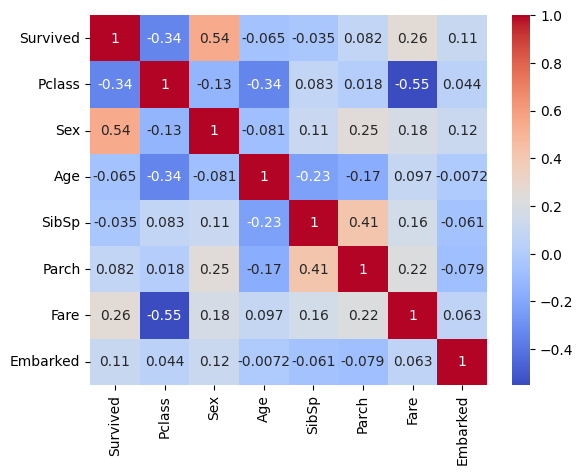

In [31]:
# Calculate the correlation matrix
matrix = df.corr()

# Plot the heatmap
sns.heatmap(matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Data Normalization 

In [32]:
def z_score_standardization(series):
    return (series - series.mean()) / series.std()

for col in df.columns:
    df['Age']=z_score_standardization(df['Age'])
    df['Pclass']=z_score_standardization(df['Pclass'])
    df['Fare']=z_score_standardization(df['Fare'])
    df['SibSp']=z_score_standardization(df['SibSp'])

print(df.head())


   Survived    Pclass  Sex       Age     SibSp  Parch      Fare  Embarked
0         0  0.826913    0 -0.565419  0.432550      0 -0.502163       0.0
1         1 -1.565228    1  0.663488  0.432550      0  0.786404       1.0
2         1  0.826913    1 -0.258192 -0.474279      0 -0.488580       0.0
3         1 -1.565228    1  0.433068  0.432550      0  0.420494       0.0
4         0  0.826913    0  0.433068 -0.474279      0 -0.486064       0.0


In [33]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.118593
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.007165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000


In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.826913,0,-0.565419,0.432550,0,-0.502163,0.0
1,1,-1.565228,1,0.663488,0.432550,0,0.786404,1.0
2,1,0.826913,1,-0.258192,-0.474279,0,-0.488580,0.0
3,1,-1.565228,1,0.433068,0.432550,0,0.420494,0.0
4,0,0.826913,0,0.433068,-0.474279,0,-0.486064,0.0


Model training 

In [35]:
df=df.dropna()

In [36]:
#splitting labeled and features into X and y
X=df.iloc[:,:-1]; y=df.iloc[:,-1]

In [37]:
X.shape

(889, 7)

In [38]:
y.shape

(889,)

In [39]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [41]:
X_train.shape

(711, 7)

In [42]:
model_rf=RandomForestClassifier()

In [43]:
y_train.isna().sum()

0

In [44]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
train_rf=model_rf.predict(X_train)
test_rf=model_rf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(train_rf,y_train)

0.9943741209563994

In [48]:
accuracy_score(test_rf,y_test)

0.8033707865168539

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [51]:
Rcross = cross_val_score(model_rf, X_test, y_test, cv=4)
print(Rcross)

[0.8        0.73333333 0.75       0.70454545]


In [52]:
Rcross.mean()

0.746969696969697

In [54]:
rfc_2=RandomForestClassifier()

In [61]:
params={
    'bootstrap': [True, False],
    'max_depth':[10,15,20,25],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 150, 180, 200],
    'max_features': ['auto', 'sqrt']
}

In [62]:
random_search=RandomizedSearchCV(estimator=rfc_2,param_distributions=params, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)

In [63]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=180; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_fea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=180; total time=   0.6s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=25, max_feat

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=180; total time=   0.7s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   0.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=25, max_fe

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [50, 100, 150, 180,
                                                         200]},
                   random_state=42, verbose=2)

In [64]:
best_params = random_search.best_params_
print("Best parameters: ", best_params)


Best parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [65]:
best_rfc=RandomForestClassifier(**best_params)

In [69]:
best_rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=50)

In [71]:
y_train_brfc=best_rfc.predict(X_train)
y_test_brfc=best_rfc.predict(X_test)

In [73]:
print(f"The train score is {accuracy_score(y_train,y_train_brfc)}")
print(f"The test score is {accuracy_score(y_test,y_test_brfc)}")

The train score is 0.9184247538677919
The test score is 0.7808988764044944


In [74]:
Rcross_brfc = cross_val_score(best_rfc, X_test, y_test, cv=4)
print(Rcross_brfc)

[0.77777778 0.75555556 0.79545455 0.68181818]


In [75]:
Rcross_brfc.mean()

0.7526515151515151

In [ ]:
model_lr=LogisticRegression(max_iter=2000)

In [ ]:
model_lr.fit(X_train,y_train)

In [ ]:
Y_predict=model_lr.predict(X_train)

In [ ]:
accuracy_score(y_train,Y_predict)

In [ ]:
Y_test_predict=model_lr.predict(X_test)

In [ ]:
accuracy_score(y_test,Y_test_predict)

So there seems to be slight underfitting of the model. It may be beacuse of less data

Trying an SVM model

In [ ]:
linear_SVM=LinearSVC()

In [ ]:
linear_SVM.fit(X_train,y_train)

In [ ]:
y_predict_svm=linear_SVM.predict(X_train)

In [ ]:
accuracy_score(y_predict_svm,y_train)

In [ ]:
y_predict_svm_test=linear_SVM.predict(X_test)

In [ ]:
accuracy_score(y_predict_svm_test,y_test)

Using kernal trick with SVM to see if it can perform better


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')  # 'rbf' stands for Radial Basis Function, a common choice for the kernel
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train=clf.predict(X_train)


In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
accuracy_score(y_pred_train,y_train)

In [ ]:
#using plynomial kernal for svm 
svm_poly=svm.SVC(kernel="poly")
svm_poly.fit(X_train,y_train)
Y_pred_svm_train=svm_poly.predict(X_train)
Y_pred_svm_test=svm_poly.predict(X_test)

In [ ]:
print(f"The training accuracy is {accuracy_score(Y_pred_svm_train,y_train)}")
print(f"The test accuracy is {accuracy_score(Y_pred_svm_test,y_test)}")

In [ ]:
#using sigmoid kernal for svm 
svm_sigmoid=svm.SVC(kernel="sigmoid")
svm_sigmoid.fit(X_train,y_train)
Y_pred_sigmoid_train=svm_sigmoid.predict(X_train)
Y_pred_sigmoid_test=svm_sigmoid.predict(X_test)

In [ ]:
print(f"The training accuracy is {accuracy_score(Y_pred_sigmoid_train,y_train)}")
print(f"The test accuracy is {accuracy_score(Y_pred_sigmoid_test,y_test)}")

In [ ]:
def accuracy_print(X,Y):
    print(f"The training accuracy score is : {X}")
    print(f"The test accuracy score is:{Y}")

From the above resuts we can conclude that linear svm and rbf kernal perform better

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
#Using Decision Tree
DTC=DecisionTreeClassifier(random_state=42)
DTC.fit(X_train,y_train)
y_dtc_predict_train=DTC.predict(X_train)
y_dtc_predict_test=DTC.predict(X_test)

In [ ]:
accuracy_score_train=accuracy_score(y_train,y_dtc_predict_train)


In [ ]:
accuracy_score_test=accuracy_score(y_test,y_dtc_predict_test)


In [ ]:
accuracy_print(accuracy_score_train,accuracy_score_test)

we can see there is clearly overfitting of the model


Hyper parameters to solve the overfitting

In [ ]:
#Using max_depth
DTC_md = DecisionTreeClassifier(max_depth=6, random_state=42)
DTC_md.fit(X_train,y_train)
y_dtc_md_train=DTC_md.predict(X_train)
y_dtc_md_test=DTC_md.predict(X_test)


In [ ]:
accuracy_score(y_train,y_dtc_md_train)

In [ ]:
accuracy_score(y_test,y_dtc_md_test)

In [ ]:
#Using min_sample_split #pruning
DTC_pr = DecisionTreeClassifier(criterion="entropy",min_samples_split=35, random_state=42)
DTC_pr.fit(X_train,y_train)
y_dtc_pr_train=DTC_pr.predict(X_train)
y_dtc_pr_test=DTC_pr.predict(X_test)

In [ ]:
accuracy_score(y_train,y_dtc_pr_train)

In [ ]:
accuracy_score(y_test,y_dtc_pr_test)

In [ ]:
#Using min_sample_split #pruning
DTC_leaf = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=15, random_state=42)
DTC_leaf.fit(X_train,y_train)
y_dtc_lf_train=DTC_leaf.predict(X_train)
y_dtc_lf_test=DTC_leaf.predict(X_test)

In [ ]:
accuracy_score(y_train,y_dtc_lf_train)

In [ ]:
accuracy_score(y_test,y_dtc_lf_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers 
from keras.optimizers import SGD
from keras.optimizers import Adagrad

In [ ]:
opt=Adagrad()

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1])) # Input layer

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
ann.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# #


In [ ]:
loss, accuracy = ann.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

# Make predictions
predictions = ann.predict(X_test)

# If you want to see the accuracy for each epoch, you can do this:
print("Accuracy for each epoch:")
print(history.history['accuracy'])